Works!!


https://www.sharemarkethub.com/2020/05/09/data-science-projects/

In [26]:
import numpy as np
import pandas as pd
import math

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

plt.style.use('fivethirtyeight')
from nsepy import get_history
from datetime import date

In [27]:
symbol = input("Enter symbol of Stock:")
start = date(2015, 1, 1)
end = date.today()
df = get_history(symbol = symbol, start = start, end = end)
df['Date'] = df.index

In [28]:
df.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date
Date,,,,,,,,,,,,,,,
2015-01-01,CIPLA,EQ,626.40,626.50,634.80,626.50,629.95,628.40,630.72,596787,3.764074e+13,9333,201185,0.3371,2015-01-01
2015-01-02,CIPLA,EQ,628.40,633.00,637.55,629.35,631.00,630.15,632.96,688999,4.361072e+13,11080,332082,0.4820,2015-01-02
2015-01-05,CIPLA,EQ,630.15,626.00,638.00,626.00,632.40,633.00,633.49,1282895,8.126986e+13,22739,689132,0.5372,2015-01-05
2015-01-06,CIPLA,EQ,633.00,631.00,632.00,610.50,613.95,614.35,619.76,1615490,1.001214e+14,56508,990511,0.6131,2015-01-06
2015-01-07,CIPLA,EQ,614.35,614.35,617.80,604.50,616.10,611.95,611.50,813936,4.977222e+13,34254,371081,0.4559,2015-01-07


In [29]:
df.tail(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date
Date,,,,,,,,,,,,,,,
2021-03-19,CIPLA,EQ,755.15,751.0,767.25,738.10,761.00,760.65,757.35,5262000,3.985174e+14,87583,2584091,0.4911,2021-03-19
2021-03-22,CIPLA,EQ,760.65,762.0,784.60,758.70,772.00,772.85,774.43,3563266,2.759514e+14,88441,1112403,0.3122,2021-03-22
2021-03-23,CIPLA,EQ,772.85,775.0,779.40,768.40,776.85,776.10,774.86,2118532,1.641559e+14,56376,610420,0.2881,2021-03-23
2021-03-24,CIPLA,EQ,776.10,777.8,798.70,772.65,791.00,792.95,789.82,6904173,5.453025e+14,118668,1808708,0.2620,2021-03-24
2021-03-25,CIPLA,EQ,792.95,796.9,802.30,783.30,788.65,787.25,791.95,5292130,4.191119e+14,105987,1535589,0.2902,2021-03-25


In [30]:
df.shape

(1544, 15)

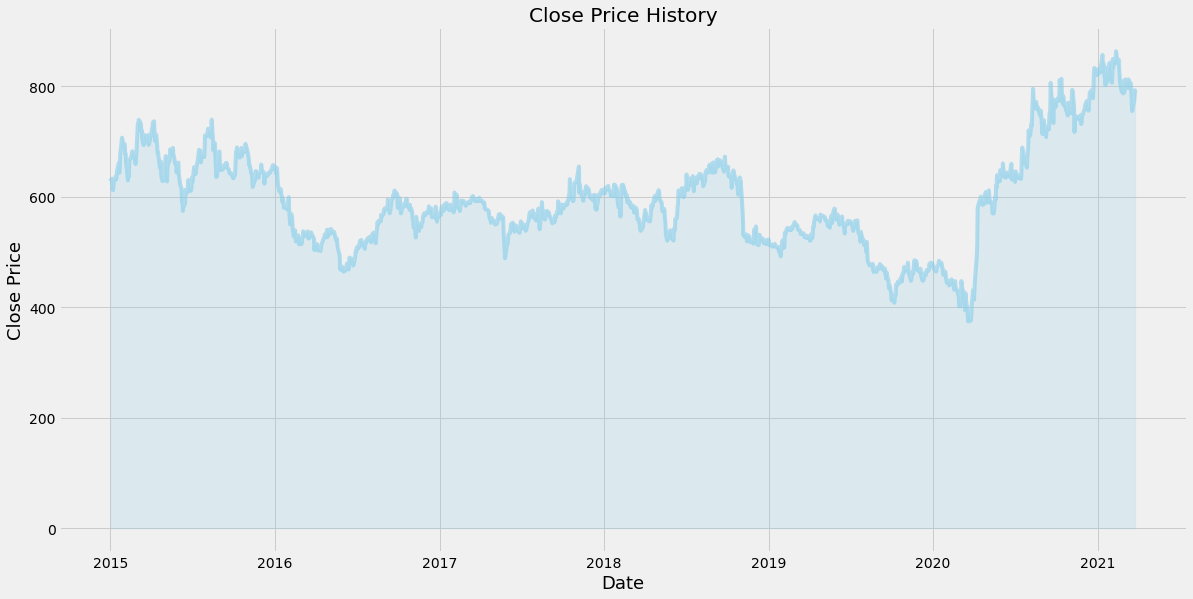

In [31]:
plt.figure(figsize = (18, 9))
plt.title('Close Price History')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.fill_between(df['Date'], df['Close'], color = "skyblue", alpha = 0.2)
plt.plot(df['Date'], df['Close'], color = "skyblue", alpha = 0.6)
plt.show()

In [32]:
# Create a new dataframe to store the close prices
data = df.filter(['Close'])
# Converting the dataframe to a numpy array
dataset = data.values
# divide the dataset into training data and testing data 
training_data_len = math.ceil(len(dataset)*0.75)

In [33]:
# Scale data to be values between 0 and 1
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

In [34]:
# Creating the training data set from scaled dataset
prediction_days = 30
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train
x_train = []
y_train = []
for i in range(prediction_days, len(train_data)):
    x_train.append(train_data[i - prediction_days:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



In [35]:
# Build the model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dense(units = 25))
model.add(Dense(units = 1))

In [36]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [37]:
# Train the model
model.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
36/36 [==============================] - 6s 22ms/step - loss: 0.0941
Epoch 2/100
36/36 [==============================] - 1s 22ms/step - loss: 0.0038
Epoch 3/100
36/36 [==============================] - 1s 23ms/step - loss: 0.0026
Epoch 4/100
36/36 [==============================] - 1s 23ms/step - loss: 0.0022
Epoch 5/100
36/36 [==============================] - 1s 25ms/step - loss: 0.0019
Epoch 6/100
36/36 [==============================] - 1s 25ms/step - loss: 0.0018
Epoch 7/100
36/36 [==============================] - 1s 25ms/step - loss: 0.0016
Epoch 8/100
36/36 [==============================] - 1s 42ms/step - loss: 0.0016
Epoch 9/100
36/36 [==============================] - 1s 41ms/step - loss: 0.0016
Epoch 10/100
36/36 [==============================] - 1s 41ms/step - loss: 0.0014
Epoch 11/100
36/36 [==============================] - 1s 26ms/step - loss: 0.0014
Epoch 12/100
36/36 [==============================] - 1s 26ms/step - loss: 0.0012
Epoch 13/100
36/36 [=====

In [39]:
# Save the model
model.save(symbol+'.model')

INFO:tensorflow:Assets written to: cipla.model\assets
INFO:tensorflow:Assets written to: cipla.model\assets


In [40]:
# Test Data set
test_data = scaled_data[training_data_len - prediction_days:, : ]
# Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i - prediction_days: i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)
# Reshape the data into the shape accepted by the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [41]:
# Getting the model's predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(len(predictions))
# Calculate RMSE Value
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print("RMSE:", rmse)

386
RMSE: 16.350749441529587


<ipython-input-42-89e04d980dce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


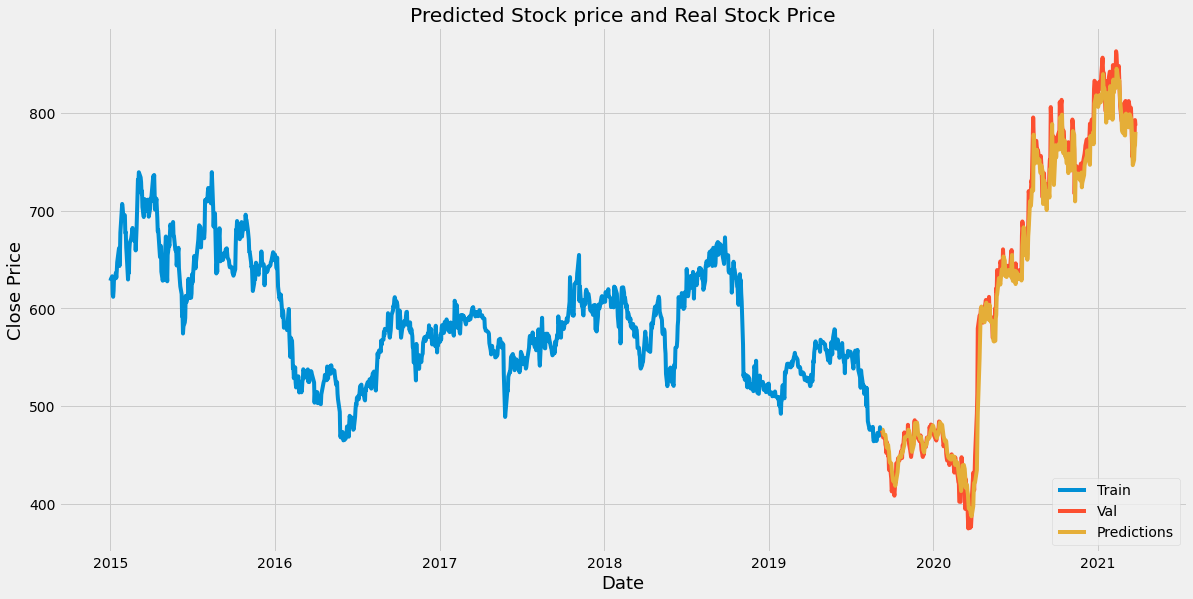

In [42]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualizing the data
plt.figure(figsize = (18, 9))
plt.title('Predicted Stock price and Real Stock Price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [43]:
valid[-5:]

,Close,Predictions
Date,,
2021-03-19,760.65,746.792725
2021-03-22,772.85,752.154602
2021-03-23,776.10,764.443848
2021-03-24,792.95,767.272766
2021-03-25,787.25,780.859009


In [54]:

from datetime import datetime, timedelta

# Next Day Price Predcition 
newdf = df.filter(['Close'])
print("newdf.head(5)\n")
print(newdf.head(5))
print("newdf.tail(5)\n")
print(newdf.tail(5))

for i in range(5):
    last_30_days = newdf[-30:].values
    last_30_days_scaled = scaler.transform(last_30_days)
    print("last_30_days:\n")
    print(last_30_days)
    
    x_test = []
    x_test.append(last_30_days_scaled)
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    pred_price = model.predict(x_test)
    pred_price = scaler.inverse_transform(pred_price)
    
    print("Predicted Price:{}".format(pred_price))
    
    last_date = date.today()
    next_date = last_date + timedelta(days = i)
    
    newdf.loc[next_date, 'Close'] = pred_price
    # df2 = {'Close': pred_price} 
    # # pred_price = int(pred_price)
    # # newdf.append(pd.DataFrame(df, index=[last_date]))
    # print(newdf.tail(10))
print("next five day predictions are: {}".format(newdf[-5:]))
newdf['Close'] = newdf['Close'].astype('int')
print("Datatype of newdf[-1:] is: {}".format(newdf.dtypes))
print("next 5 day prediction is:{}".format(newdf['Close'][-5:]))


newdf.head(5)

             Close
Date              
2015-01-01  628.40
2015-01-02  630.15
2015-01-05  633.00
2015-01-06  614.35
2015-01-07  611.95
newdf.tail(5)

             Close
Date              
2021-03-19  760.65
2021-03-22  772.85
2021-03-23  776.10
2021-03-24  792.95
2021-03-25  787.25
last_30_days:

[[859.8 ]
 [848.55]
 [844.3 ]
 [848.35]
 [835.7 ]
 [825.45]
 [807.35]
 [792.45]
 [790.95]
 [789.05]
 [809.15]
 [787.05]
 [789.8 ]
 [811.8 ]
 [812.5 ]
 [806.75]
 [805.15]
 [809.25]
 [797.  ]
 [812.4 ]
 [805.95]
 [805.5 ]
 [792.3 ]
 [772.15]
 [755.15]
 [760.65]
 [772.85]
 [776.1 ]
 [792.95]
 [787.25]]
Predicted Price:[[775.8086]]
last_30_days:

[[859.8       ]
 [848.55      ]
 [844.3       ]
 [848.35      ]
 [835.7       ]
 [825.45      ]
 [807.35      ]
 [792.45      ]
 [790.95      ]
 [789.05      ]
 [809.15      ]
 [787.05      ]
 [789.8       ]
 [811.8       ]
 [812.5       ]
 [806.75      ]
 [805.15      ]
 [809.25      ]
 [797.        ]
 [812.4       ]
 [805.95      ]
 [805.5 

In [55]:
stock_pred_id = symbol + '_' + str(next_date.strftime('%d%m%Y'))   #'cipla_18032021' # (stock_symbol + _ + ddmmyy)
print("stock_red_id:", stock_pred_id)

stock_red_id: cipla_29032021


In [56]:
newdf.dtypes

Close    int32
dtype: object

In [57]:
type(newdf['Close'][-1:])

pandas.core.series.Series

In [58]:
pd.to_numeric(newdf['Close'])

Date
2015-01-01    628
2015-01-02    630
2015-01-05    633
2015-01-06    614
2015-01-07    611
             ... 
2021-03-25    775
2021-03-26    765
2021-03-27    754
2021-03-28    743
2021-03-29    735
Name: Close, Length: 1548, dtype: int32

In [67]:
type(newdf['Close'][1547])

numpy.int32

In [69]:
print(len(newdf['Close']))

1548
